## GlucoSense- AI-Powered Diabetes Detection for Early Intervention

#### Title:

Identification of Diabetes in a person based on healthcare statistics.

#### Problem Statement:

Diabetes cases over the past fifteen years have bloomed all over the world. Lifestyle plays a very important role in it. In recent years, there has been an improvement in awareness regarding the health effects of diabetes. This has led to people getting themselves tested for diabetes than they would have earlier, as its risk can be reduced if it is predicted early.

### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

### Load the dataset

In [2]:
data = pd.read_csv("diabetes_risk_prediction_dataset.csv")

### Exploratory Data Analysis

### Display Basic Information

In [3]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class

In [5]:
print("Shape of the dataset")
print(data.shape)

Shape of the dataset
(520, 17)


In [6]:
print("Columns in the dataset are:")
data.columns

Columns in the dataset are:


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [7]:
print("Number of duplicate rows:")
print(data.duplicated().sum())

Number of duplicate rows:
269


In [8]:
data=data.drop_duplicates()

In [9]:
print("statistics of every column")
data.describe(include='all')

statistics of every column


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,251.000000,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,Positive
freq,NaN,160,132,127,147,159,134,184,140,127,180,126,139,153,161,207,173
mean,48.864542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.526036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
              Age
count  251.000000
mean    48.864542
std     12.526036
min     16.000000
25%     39.000000
50%     48.000000
75%     58.000000
max     90.000000


In [11]:
print("Missing Values in the Dataset:")
print(data.isnull().sum())

Missing Values in the Dataset:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [12]:
data['class'].describe()

count          251
unique           2
top       Positive
freq           173
Name: class, dtype: object

In [13]:
print("Data type of each column")
print(data.dtypes)

Data type of each column
Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


### Outlier detection:

In [14]:
def find_outliers_iqr(data):
    outliers_dict = {}
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_dict[column] = outliers
        print(f"\nOutliers in '{column}':")
        print(outliers)
    return outliers_dict
outliers = find_outliers_iqr(data)


Outliers in 'Age':
     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
102   90  Female       No        Yes                Yes       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
102            Yes             Yes     Yes           No              No   

    partial paresis muscle stiffness Alopecia Obesity     class  
102              No              Yes      Yes      No  Positive  


### Data overview:

Number of entries=520

Number of columns=17

The data contains mostly object datatype only age is int datatype.The above dataset doesn't contain any missing values.Most of the features have "No" value highest. There are some outliers in the dataset.There are 269 duplicate rows are present in the dataset.So we drop those rows and continue with analysis.

### Univariate Analysis

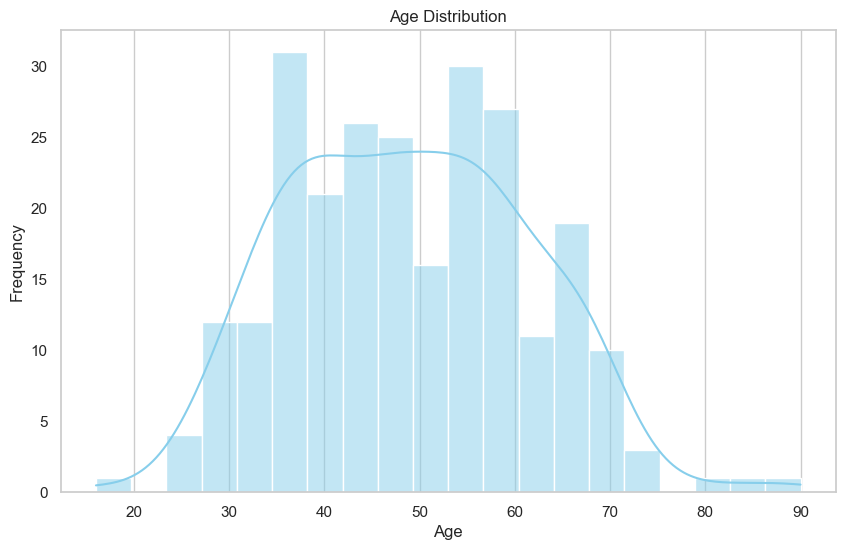

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

From the above graph it is clear that we have more data about people in between age group of 50-60 and 30-40. We have less data about the people in age group of <20 and >80.All the other age groups are evenly distributed.

### Bivariate Analysis

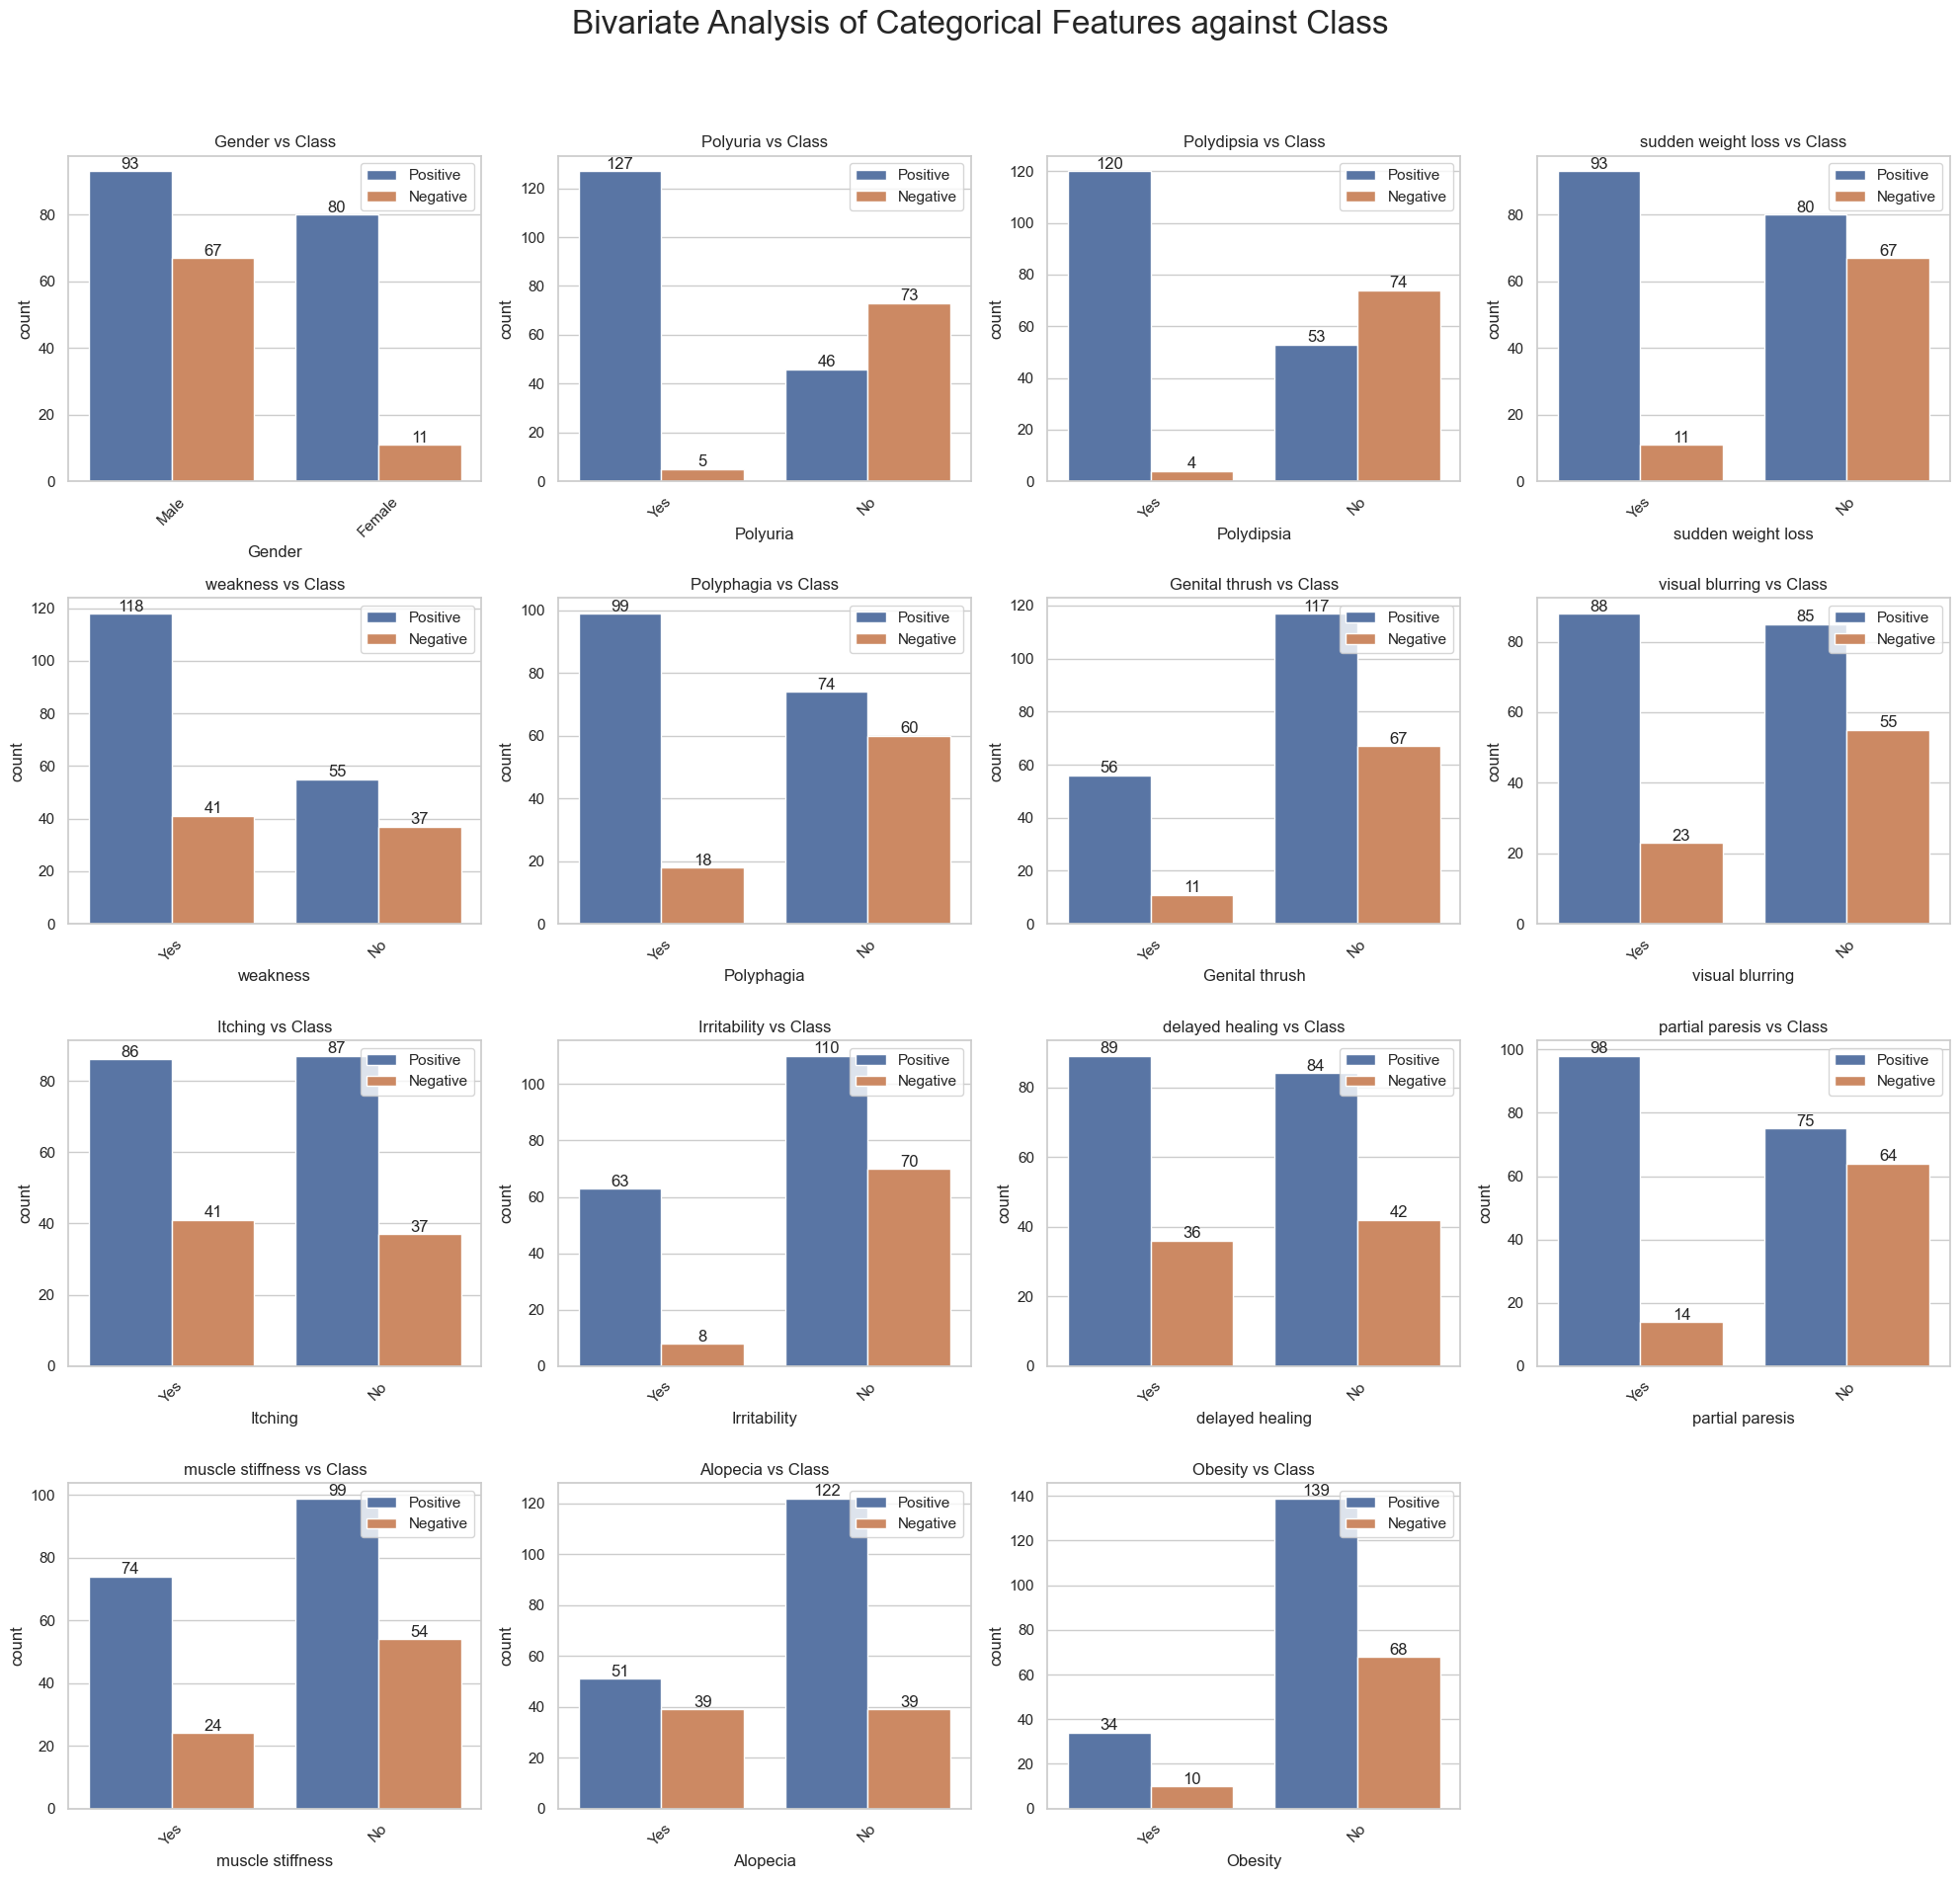

In [16]:
important_features = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                      'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
                      'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
n_cols = 4  
n_rows = -(-len(important_features) // n_cols)  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
fig.suptitle('Bivariate Analysis of Categorical Features against Class', fontsize=24)
axes = axes.flatten()
for i, feature in enumerate(important_features):
    ax = axes[i]
    if i == 0:
        plot = sns.countplot(data=data, x=feature, hue='class', ax=ax)
    else:
        plot = sns.countplot(data=data, x=feature, hue='class', ax=ax, order=["Yes", "No"])
    ax.set_title(f'{feature} vs Class')
    ax.tick_params(axis='x', rotation=45)
    for p in plot.patches:
        height = p.get_height()
        if height > 0:  
            plot.annotate(f'{int(height)}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 5), textcoords='offset points')
    plot.legend(loc='upper right')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### Gender:
The distribution of diabetes is relatively balanced across genders, but slightly higher among males with a greater proportion of "Positive" cases than females.

##### Polyuria (excessive urination):
A high percentage of "Positive" cases show the presence of polyuria, whereas the majority of "Negative" cases do not. This suggests polyuria is a strong indicator of diabetes.

##### Polydipsia (excessive thirst):
Similar to polyuria, most "Positive" cases report polydipsia, while most "Negative" cases do not. This is another strong distinguishing factor for diabetes.

##### Sudden Weight Loss:
Many "Positive" cases report sudden weight loss, while this symptom is uncommon among "Negative" cases. This reinforces the association between sudden weight loss and diabetes.

##### Weakness:
Weakness is commonly reported by "Positive" cases, though some "Negative" cases also report it. This suggests that while weakness is more prevalent among diabetics, it may not be as strong an indicator as polyuria or polydipsia.

##### Polyphagia (excessive hunger):
Polyphagia is more common in "Positive" cases compared to "Negative" ones, indicating it could be a helpful indicator of diabetes.

##### Genital Thrush:
Genital thrush is present in a significant portion of "Positive" cases but is relatively rare among "Negative" cases. This suggests it may be associated with diabetes, though it's not as prevalent as polyuria or polydipsia.

##### Visual Blurring:
Many "Positive" cases experience visual blurring, while it’s less common in "Negative" cases. This indicates a link between diabetes and vision issues.

##### Itching:
There is a notable difference in the prevalence of itching between "Positive" and "Negative" cases, with itching more common in diabetics.

##### Irritability:
Irritability appears slightly more common among "Positive" cases compared to "Negative" ones, though the difference is less pronounced than with other features.

##### Delayed Healing:
Delayed healing is frequently observed in "Positive" cases and less so in "Negative" ones, indicating it may be another relevant symptom for diabetes.

##### Partial Paresis (muscle weakness):
Partial paresis is more common in "Positive" cases than in "Negative" cases, which suggests a possible association with diabetes.

##### Muscle Stiffness:
This feature shows some prevalence among diabetics, though it's also present to a degree in "Negative" cases, making it a moderate indicator.

##### Alopecia (hair loss):
Alopecia is slightly more common in "Positive" cases, but the difference is not as pronounced, suggesting it may not be a strong indicator.

##### Obesity:
Obesity shows up in both "Positive" and "Negative" cases, indicating it may not be as strong an indicator on its own. However, it could still be a relevant risk factor in combination with other symptoms.

#### Summary

The features polyuria, polydipsia, sudden weight loss, weakness, and genital thrush show strong distinctions between diabetic and non-diabetic cases, suggesting these are particularly indicative of diabetes.

Visual blurring, itching, delayed healing, and polyphagia also demonstrate significant differences and are likely valuable indicators.

Features like irritability, partial paresis, and muscle stiffness are moderately associated with diabetes.

Gender, alopecia, and obesity appear less indicative on their own but may be relevant when combined with other features.

### Corelation Matrix

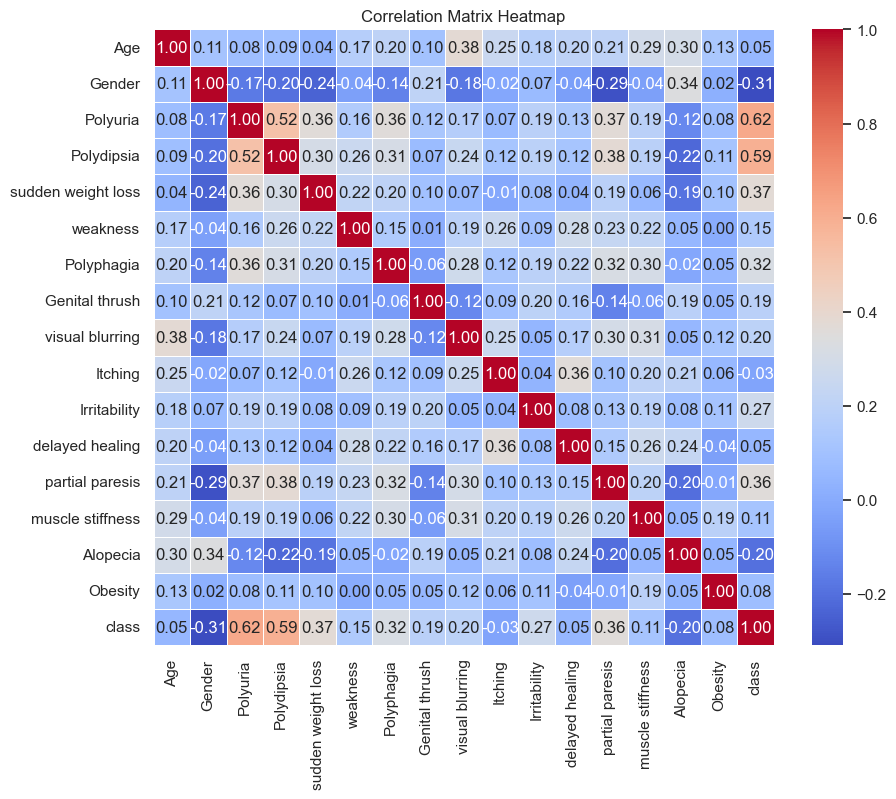

In [17]:
df_encoded = data.copy()
label_encoders = {}
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The top features that are highly correlated with target variable are:

#### High Positive Correlations:
Polyuria and Polydipsia have a strong positive correlation , suggesting these symptoms often co-occur.
Polyuria and class : Polyuria shows a strong positive correlation with diabetes presence.
Polydipsia and class : Similarly, Polydipsia is also strongly correlated with the class, indicating that it may be an important feature for diabetes prediction.

#### High Negative Correlations:
No strong negative correlations were found.

#### Top Correlated Features with the Target (class):
Polyuria: 0.62 (strongest predictor of diabetes presence).
Polydipsia: 0.59 (second strongest predictor).
Sudden Weight Loss: 0.37 (moderate correlation with diabetes presence).

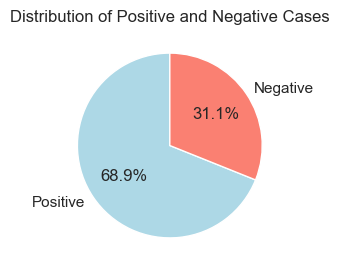

In [18]:
class_counts = data['class'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Distribution of Positive and Negative Cases')
plt.show()

We have more positive cases i.e.,61.5% than negative cases i.e.,38.5%

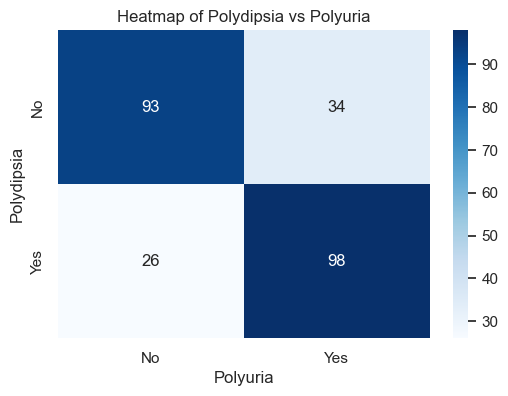

In [19]:
contingency_table = pd.crosstab(data['Polydipsia'], data['Polyuria'])
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Polydipsia vs Polyuria')
plt.xlabel('Polyuria')
plt.ylabel('Polydipsia')
plt.show()

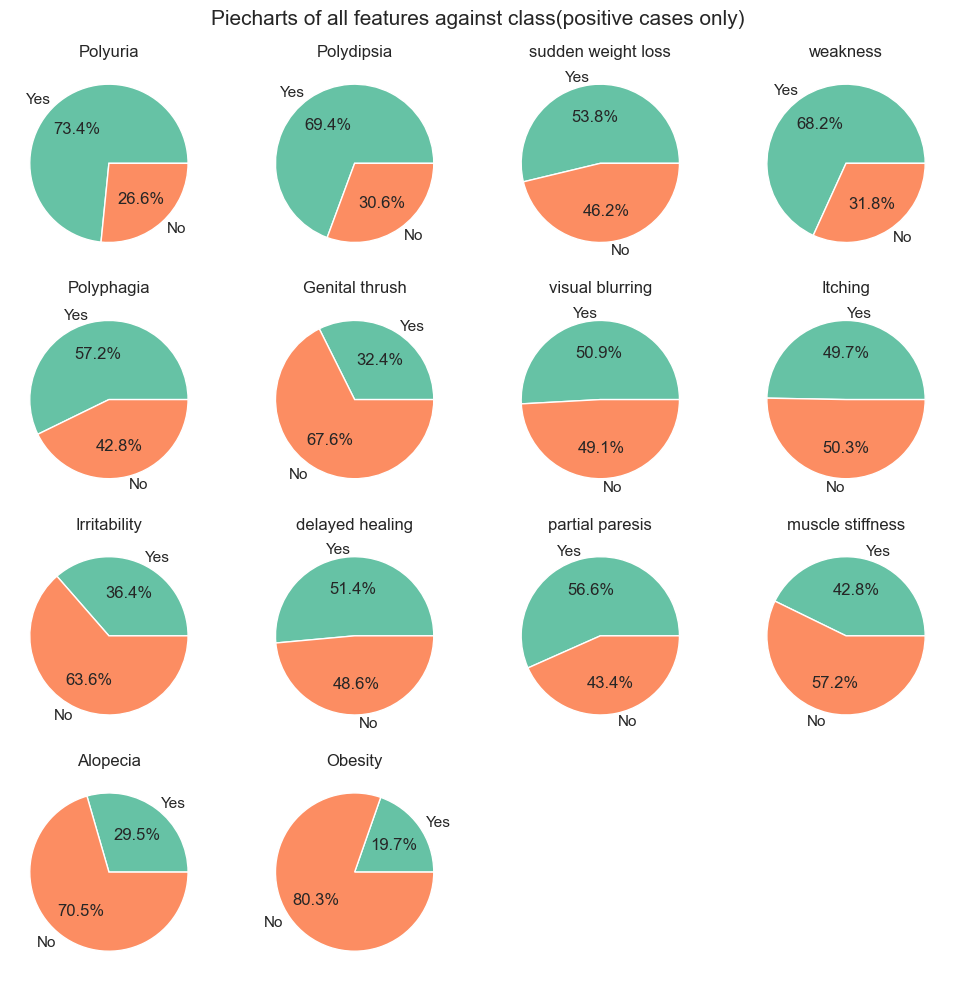

In [20]:
yes_color = '#66c2a5' 
no_color = '#fc8d62'  
colors = [yes_color, no_color]
binary_features = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                   'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                   'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 
                   'Alopecia', 'Obesity'] 
positive_diabetes = data[data['class'] == 'Positive']
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
fig.suptitle("Piecharts of all features against class(positive cases only)",fontsize=15) 
axes = axes.flatten()
for i, feature in enumerate(binary_features):
    counts = positive_diabetes[feature].value_counts()
    counts = counts.reindex(['Yes', 'No'], fill_value=0)
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    axes[i].set_title(feature)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

#### High Prevalence of Certain Symptoms:
Features like Polyuria, Polydipsia, weakness, and sudden weight loss show a high percentage of "Yes" responses among individuals with diabetes. This suggests that these symptoms are strongly associated with positive diabetes cases.

#### Moderate Association with Other Symptoms:
Conditions such as visual blurring, delayed healing, Itching, and partial paresis have a balanced distribution of "Yes" and "No" responses, indicating they may be common but not universal among those with diabetes.

#### Low Association for Certain Symptoms:
Some symptoms, like Alopecia and Genital thrush, have a lower percentage of "Yes" responses, implying these are less frequently observed in individuals with diabetes in this dataset. This may suggest a weaker correlation between these symptoms and diabetes.

#### Potential Indicators of Severe Cases:
Symptoms like Polyuria, Polydipsia, and sudden weight loss appear very prominently (mostly "Yes" responses). These could be key indicators to flag or prioritize in diabetes screening, as they are more common in positive cases.

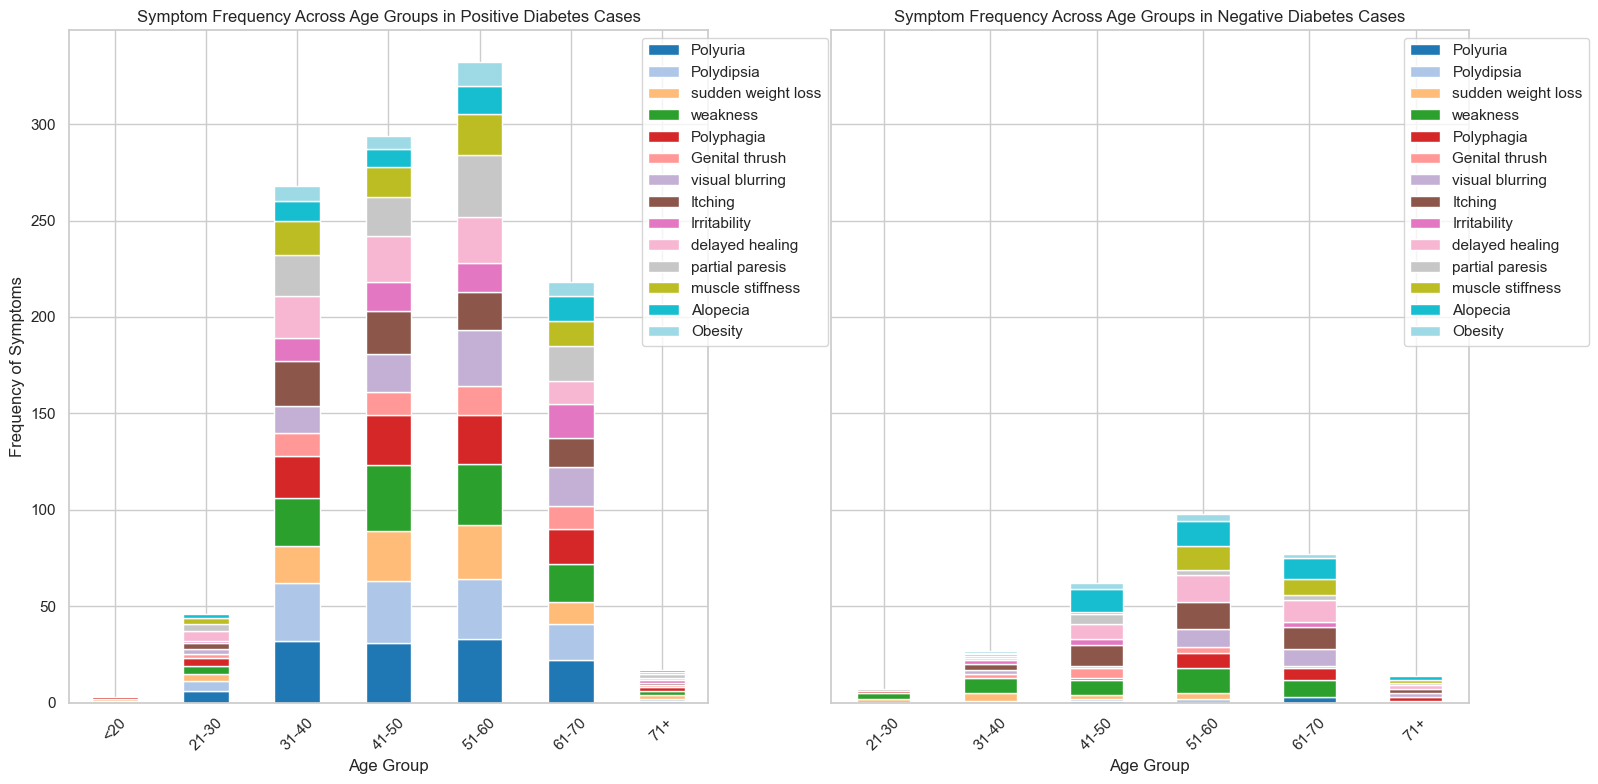

In [21]:
binary_features = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                   'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                   'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 
                   'Alopecia', 'Obesity']
positive_diabetes_copy = data[data['class'] == 'Positive'].copy()
negative_diabetes_copy = data[data['class'] == 'Negative'].copy()
age_bins = [0, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['<20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
positive_diabetes_copy['Age Group'] = pd.cut(positive_diabetes_copy['Age'], bins=age_bins, labels=age_labels)
negative_diabetes_copy['Age Group'] = pd.cut(negative_diabetes_copy['Age'], bins=age_bins, labels=age_labels)
age_symptom_counts_positive = positive_diabetes_copy.groupby('Age Group', observed=True)[binary_features].apply(lambda x: (x == 'Yes').sum())
age_symptom_counts_negative = negative_diabetes_copy.groupby('Age Group', observed=True)[binary_features].apply(lambda x: (x == 'Yes').sum())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
age_symptom_counts_positive.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')
ax1.set_title('Symptom Frequency Across Age Groups in Positive Diabetes Cases')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Frequency of Symptoms')
ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
ax1.tick_params(axis='x', rotation=45)
age_symptom_counts_negative.plot(kind='bar', stacked=True, ax=ax2, colormap='tab20')
ax2.set_title('Symptom Frequency Across Age Groups in Negative Diabetes Cases')
ax2.set_xlabel('Age Group')
ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Symptom Frequency in Positive Diabetes Cases:
##### Prevalence Across Age Groups: 
Symptoms are more frequently observed in the 40–60 age range for individuals with diabetes, indicating a higher incidence of diabetes-related symptoms in middle-aged groups.
#### Top Symptoms:
##### Polyuria and Polydipsia: 
These symptoms are consistently higher across most age groups, particularly among middle-aged individuals, reinforcing their importance as diabetes indicators.
##### Weakness and sudden weight loss: 
These symptoms show a noticeable frequency, especially in the 31-50 age groups, suggesting they could be predictive features for early detection in younger adults.
##### Elderly Groups: 
The 60+ age group also shows a high frequency of symptoms, but with fewer cases compared to the middle-aged group, possibly due to fewer data samples or natural attrition of health in older age groups.
### Symptom Frequency in Negative Diabetes Cases
##### Lower Overall Symptom Frequency: 
For individuals without diabetes, symptoms like Polyuria and Polydipsia are notably less frequent across all age groups, confirming that these symptoms are strongly associated with diabetes.
##### Age Group Variability: 
Unlike positive cases, symptom frequencies do not show a strong age dependency and are relatively consistent across age groups, suggesting that these symptoms may not be common in non-diabetic individuals.
##### Symptom Occurrence: 
Symptoms such as Alopecia and Obesity show some presence across age groups even in negative cases, indicating that these factors might be influenced by other conditions not directly related to diabetes.
### Comparative Age Group Trends
##### Higher Symptom Rates in Middle Age for Diabetics: 
Positive diabetes cases exhibit a peak in symptoms in the 40-60 age range, while negative cases do not show such a peak, reinforcing that this age group is a critical period for diabetes management and intervention.
Young and Elderly Groups: Both positive and negative cases show fewer symptoms in <20 and 70+ age groups, possibly due to fewer data points in these age brackets or lower incidence.

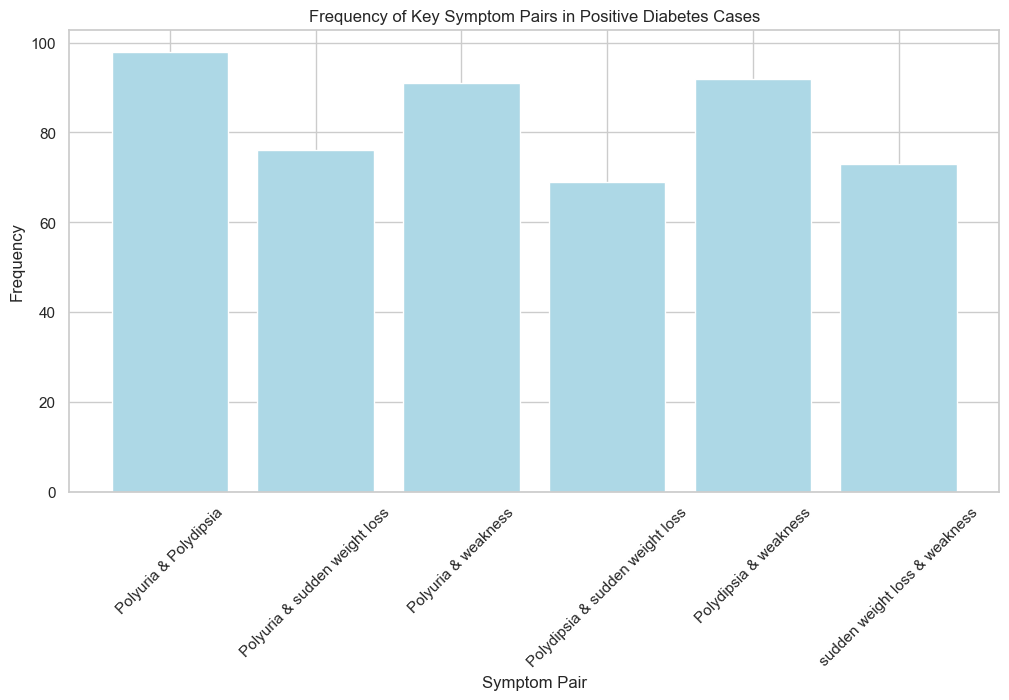

In [22]:
key_symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness']
symptom_pairs = list(combinations(key_symptoms, 2))
pair_counts = {}
for pair in symptom_pairs:
    count = positive_diabetes[(positive_diabetes[pair[0]] == 'Yes') & (positive_diabetes[pair[1]] == 'Yes')].shape[0]
    pair_counts[f"{pair[0]} & {pair[1]}"] = count
plt.figure(figsize=(12, 6))
plt.bar(pair_counts.keys(), pair_counts.values(), color='lightblue')
plt.title('Frequency of Key Symptom Pairs in Positive Diabetes Cases')
plt.xlabel('Symptom Pair')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The graph shows the frequency of symptom pairs in positive diabetes cases, with the following insights:

##### Polyuria & Polydipsia: 
This pair has the highest frequency, suggesting that frequent urination and excessive thirst often co-occur in positive diabetes cases.
##### Polyuria & weakness and Polydipsia & weakness: 
These pairs highlighting the prevalence of weakness alongside Polyuria and Polydipsia in diabetic individuals.
##### Polyuria & sudden weight loss and Polydipsia & sudden weight loss: 
Weight loss also frequently co-occurs with Polyuria and Polydipsia, indicating it as a significant symptom in diabetes cases.

### Standardize data types

Standardizing data types ensures consistency and simplifies data processing.The process involves:

##### Categorical Data: 
Converting columns with discrete values (e.g., "Yes", "No", or categories like "Male", "Female") into a standard format, such as the category type. This reduces memory usage and speeds up operations.

##### Numerical Data: 
Ensuring all numerical data, whether integers or floats, are stored in a consistent format (e.g., float). This prevents errors during computations or scaling.

##### Uniformity Across Dataset: 
A consistent data type for similar data makes operations like statistical analysis, machine learning, and visualization more reliable and efficient.

In [23]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype(str)
    else:
        data[col] = data[col].astype(float)

In [24]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data = data.astype(float)

In [25]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,58.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,45.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Scaling the data

Min-Max Scaling (or normalization) is a data preprocessing technique that transforms data to a fixed range, typically [0, 1]. It ensures that all feature values are scaled proportionally without distorting their relationships. This is particularly useful for machine learning algorithms sensitive to feature magnitude.

In [26]:
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])

### Feature selection using chi square test

Using the Chi-Square test for feature selection is a powerful approach, especially for datasets with categorical variables. It helps identify which features are significantly associated with the target variable, allowing for the construction of more effective predictive models by focusing on the most relevant features.

In [27]:
target_column = 'class'
X = data.drop(columns=[target_column])
y = data[target_column]
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
X = X.astype(float)
chi2_selector = SelectKBest(score_func=chi2, k='all')  
chi2_selector.fit(X, y)
chi2_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)
print("Feature Selection using Chi-Square Test:")
print(chi2_scores)

Feature Selection using Chi-Square Test:
               Feature  Chi2 Score
2             Polyuria   45.890026
3           Polydipsia   44.903006
4   sudden weight loss   20.403086
12     partial paresis   18.043260
6           Polyphagia   13.449259
10        Irritability   13.006198
1               Gender    8.712006
7       Genital thrush    6.720759
14            Alopecia    6.313391
8      visual blurring    5.556841
5             weakness    2.077010
13    muscle stiffness    1.984555
15             Obesity    1.431754
11     delayed healing    0.302236
9              Itching    0.086492
0                  Age    0.044684


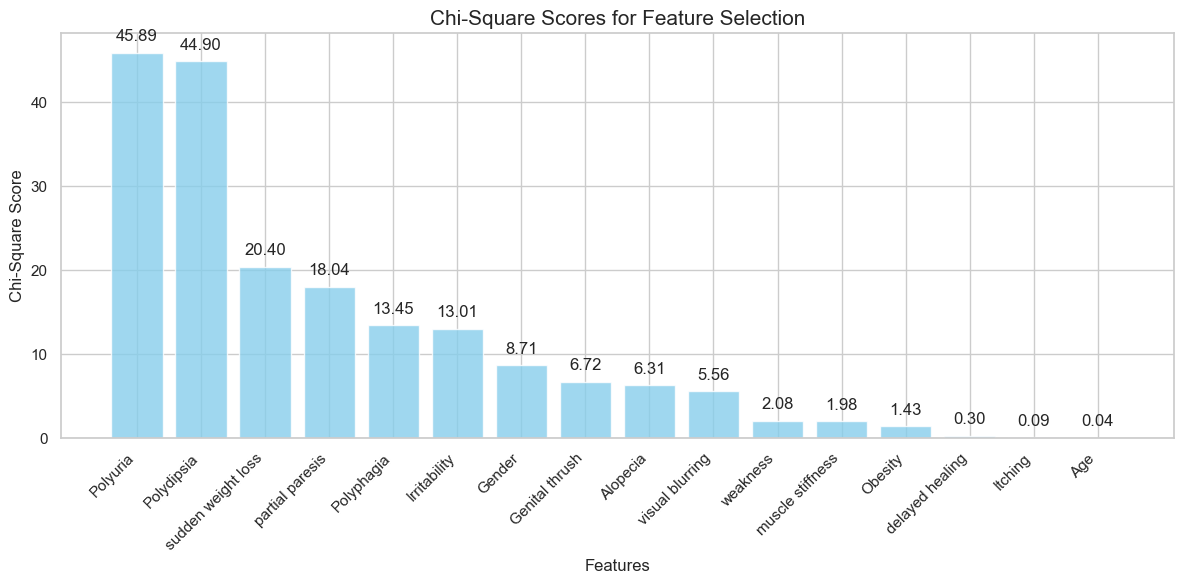

In [28]:
plt.figure(figsize=(12, 6))
bars = plt.bar(chi2_scores['Feature'], chi2_scores['Chi2 Score'], color='skyblue', alpha=0.8)
for bar, score in zip(bars, chi2_scores['Chi2 Score']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() + 1,              
        f'{score:.2f}',                    
        ha='center', va='bottom', fontsize=12
    )
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Chi-Square Score')
plt.title('Chi-Square Scores for Feature Selection',fontsize=15)
plt.tight_layout()
plt.show()

Based on the above chi square test score we can say that

#### Top Features:
Polyuria and Polydipsia have the highest Chi-square scores (~45.89 and ~44.90). These are the most strongly associated with the target variable, likely critical for predictions.
Sudden weight loss and Partial paresis also show strong relevance (scores ~20.40 and ~18.04).

#### Moderate Features:
Polyphagia, Irritability, and Genital thrush have moderate scores (~8–13). They may be relevant but less impactful compared to the top features.

#### Low-Impact Features:
Weakness, Muscle stiffness, and Obesity have low scores (<2.5), suggesting weaker associations with the target.
Delayed healing, Itching, and Age have negligible scores, likely not useful for prediction.

### Dimensionality Reduction using PCA analysis

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms a high-dimensional dataset into a lower-dimensional space while retaining most of the dataset's variance. PCA is widely used in machine learning and data preprocessing to simplify data, reduce noise, and mitigate the curse of dimensionality.

In [29]:
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = (cumulative_variance < 0.95).sum() + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 14


#### Output: 
The code gives the number of principal components (features) required to explain 95% of the variance in the data. Here the number of components is 14.

#### Actionable Steps:
But in this case we only have 17 features in which one is target feature and we remain with 16 features after performing PCA we get to know that 14 features are essential to retain 95% data. So there is no need to perform dimensionality reduction in this case

### Divide target columns from data

In [30]:
X=data.drop(columns=['class'])
y=data['class']

### Train test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (200, 16)
Shape of X_test: (51, 16)
Shape of y_train: (200,)
Shape of y_test: (51,)


We split the data into training data and testing data we take 20% of data as testing data all the remaining data is considered as training data.The shape of X_train is (200,16) and X_test is (51,16).

### Model Selection

Models to apply on the dataset:

Logistic regression

Decision Tree

Support Vector Machine

Random forest

XGBoost

Extra trees

Gradient Boosting

#### Define models

In [33]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
"XGBoost": XGBClassifier(random_state=42, eval_metric="logloss")
}

#### Hyperparameter Tuning using GridsearchCV

GridSearchCV is a powerful hyperparameter tuning method provided by the scikit-learn library in Python, designed to systematically search through a specified grid of hyperparameter values for a machine learning model while incorporating cross-validation for robust performance evaluation. By defining a parameter grid—where keys represent hyperparameters and values are lists of potential values—users can automate the process of training the model on various combinations of these hyperparameters. Once instantiated with the model and parameter grid, GridSearchCV evaluates each combination using cross-validation, allowing users to select the best-performing set of hyperparameters based on a chosen scoring metric, such as accuracy or F1 score. This approach not only simplifies model selection but also enhances the overall performance of the machine learning model by ensuring that the hyperparameters are optimized effectively.

In [34]:
tuning_params = {
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 500],
        "max_depth":[5,10,20,None],
        "min_samples_split":[2,5,10],
        "min_samples_leaf":[1,2,4]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    },
     "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf","poly"],
        "gamma":["scale","auto"]
    },
     "Extra Trees": {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
   
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
         "max_depth": [3, 5, 10]
    }
   
}

In [35]:
results = []
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    if name in tuning_params:
        grid_search = GridSearchCV(estimator=model, param_grid=tuning_params[name], cv=5, scoring='f1', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC":auc
    })


Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuning hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Tuning hyperparameters for Support Vector Machine...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Support Vector Machine: {'C': 10, 'gamma':

#### Key Insights

##### Decision Tree: 
Best parameters (max_depth=10, min_samples_leaf=2, min_samples_split=2) suggest a balanced model avoiding overfitting with reasonable complexity.

##### Random Forest: 
Best parameters (max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100) focus on creating deep trees with sufficient diversity for better generalization.

##### Gradient Boosting: 
Best parameters (learning_rate=0.2, max_depth=3, n_estimators=200) strike a balance between fast learning and capturing complex patterns iteratively.

##### Logistic Regression: 
Best parameters (C=0.1, solver=lbfgs) ensure regularization to prevent overfitting while optimizing convergence.

##### SVM: 
Best parameters (C=10, gamma=scale, kernel=rbf) prioritize high model flexibility with non-linear decision boundaries.

##### Extra Trees: 
Best parameters (max_depth=10, min_samples_split=2, n_estimators=200) use random splits to increase model diversity.

##### XGBoost: 
Best parameters (learning_rate=0.2, max_depth=3, n_estimators=200) combine regularization and boosting rounds for robust performance.

#### Evaluation of performance metrics

##### Accuracy:
The ratio of correctly predicted instances to the total instances, indicating overall correctness.

##### Precision: 
The ratio of true positive predictions to the total predicted positives, measuring the accuracy of positive predictions.

##### Recall (Sensitivity): 
The ratio of true positive predictions to the total actual positives, indicating the model's ability to identify all relevant instances.

##### F1 Score: 
The harmonic mean of precision and recall, providing a balance between the two metrics, especially useful for imbalanced datase

In [36]:
res=pd.DataFrame(results)
res

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Decision Tree,0.921569,0.942857,0.942857,0.942857,0.908929
1,Random Forest,0.921569,0.918919,0.971429,0.944444,0.891964
2,Gradient Boosting,0.862745,0.888889,0.914286,0.901408,0.832143
3,Logistic Regression,0.862745,0.850000,0.971429,0.906667,0.798214
4,Support Vector Machine,0.882353,0.871795,0.971429,0.918919,0.829464
5,Extra Trees,0.921569,0.918919,0.971429,0.944444,0.891964
6,XGBoost,0.901961,0.894737,0.971429,0.931507,0.860714


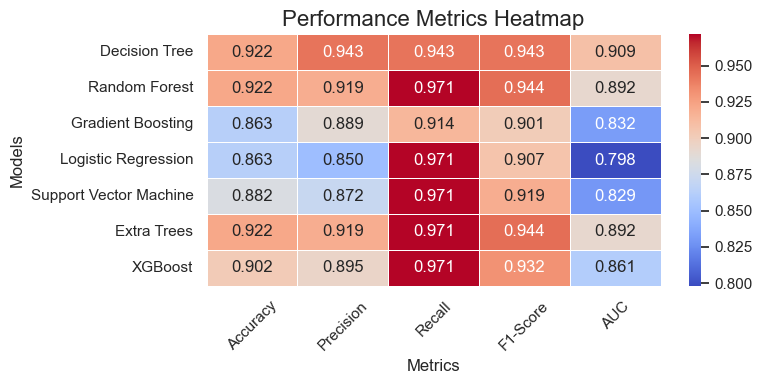

In [37]:
heatmap_data = res.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']]
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title("Performance Metrics Heatmap", fontsize=16)
plt.ylabel("Models", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The heatmap shows the performance of different machine learning models on various metrics.

##### Overall Performance
Extra Trees performs best across all metrics, with especially high AUC (0.995) and F1 Score (0.944), indicating its excellent predictive power and ability to classify correctly.
Random Forest comes in second, also excelling in AUC (0.982) and F1 Score (0.930).

##### Specific Metrics
##### AUC: 
Extra Trees, Random Forest, and XGBoost are top performers, showing their effectiveness in distinguishing between classes.
##### Precision: 
Extra Trees and Random Forest have the highest precision, suggesting their ability to minimize false positives.
##### Recall: 
XGBoost and Extra Trees achieve top recall scores, highlighting their ability to minimize false negatives.
##### F1 Score: 
Extra Trees and Random Forest achieve the highest F1 Score, demonstrating a good balance between precision and recall.

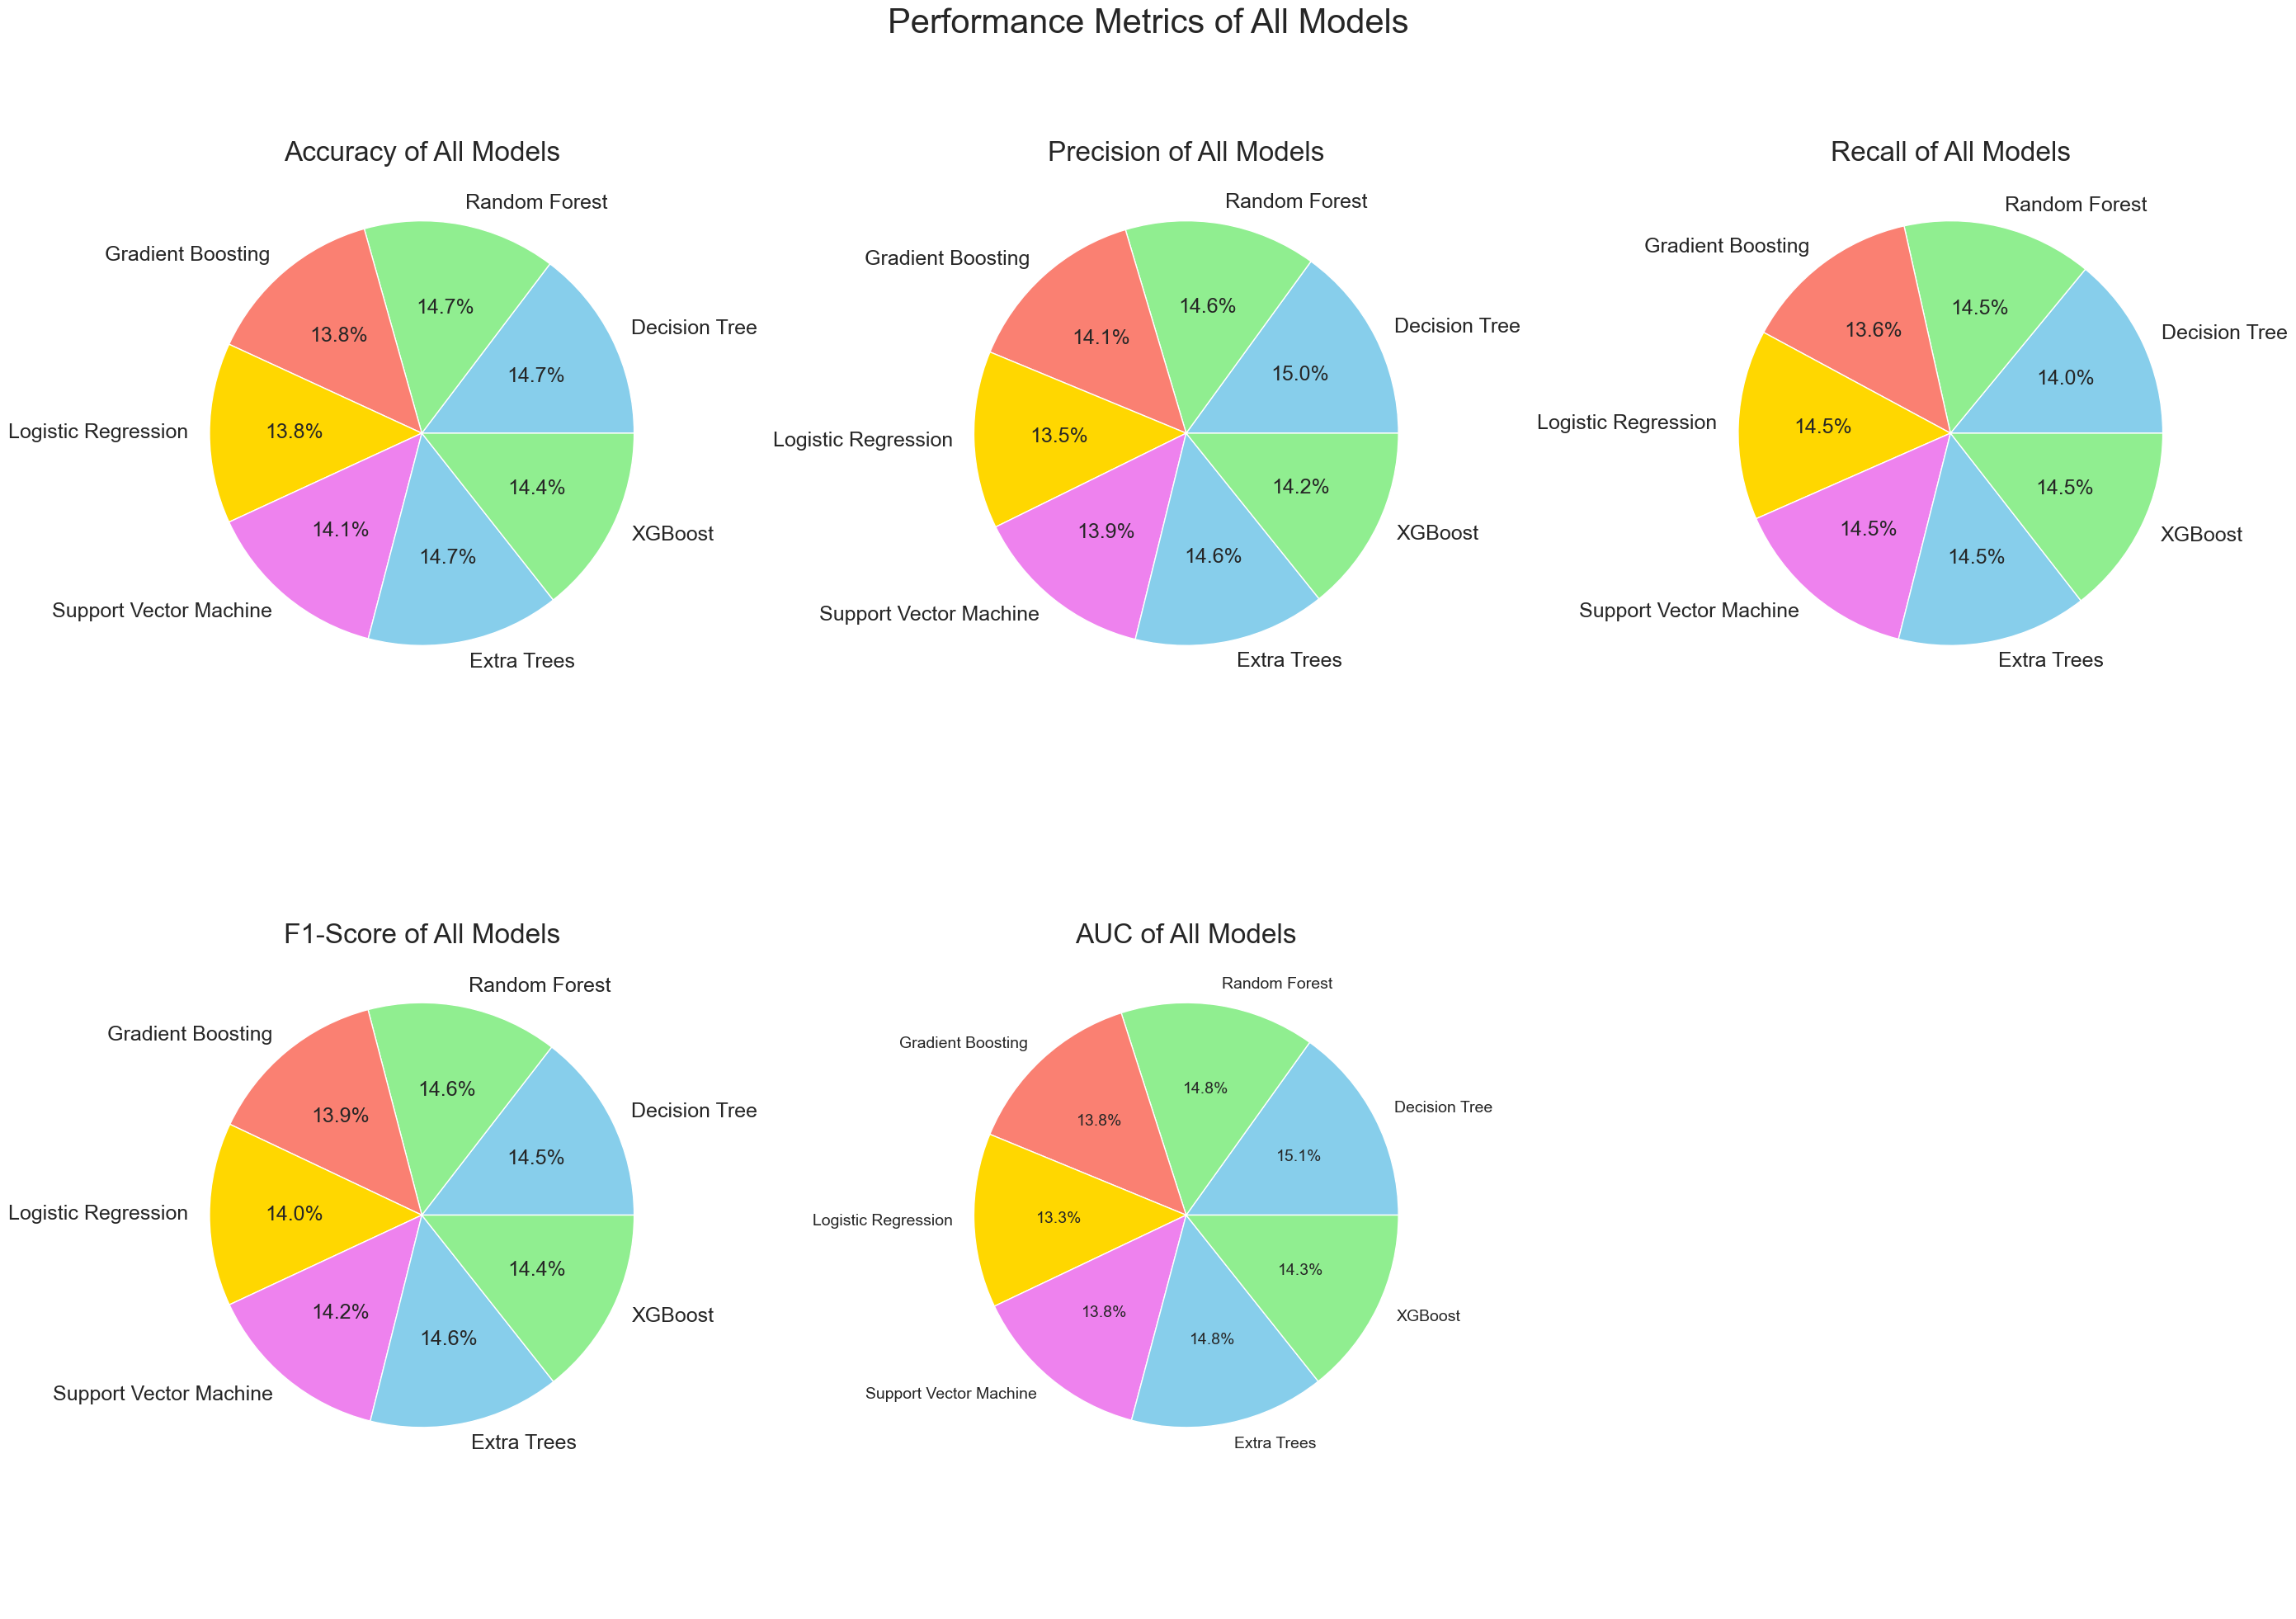

In [38]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet']
scores = res[metrics].values
models = res['Model']
fig, axes = plt.subplots(2, 3, figsize=(28, 20))
for i, metric in enumerate(metrics):
    row = i // 3 
    col = i % 3   
    ax = axes[row, col]
    metric_scores = scores[:, i]
    ax.pie(metric_scores, labels=models, autopct='%1.1f%%', colors=colors, 
           textprops={'fontsize': 18}) 
    ax.set_title(f"{metric} of All Models", fontsize=24)
auc_scores = res['AUC'].values
ax_auc = axes[1, 1]  
ax_auc.pie(auc_scores, labels=models, autopct='%1.1f%%', colors=colors, 
           textprops={'fontsize': 14})  
ax_auc.set_title("AUC of All Models", fontsize=24)
axes[1, 2].axis('off') 
plt.suptitle("Performance Metrics of All Models", fontsize=30)
plt.tight_layout()
plt.show()

#### Model Selection
Extra Trees and Random Forest stand out as the most promising models due to their strong performance across all metrics. These models would likely be the preferred choices for a classification problem. But I want to choose Random forest over extra trees

#### Reasons to Choose Random Forest Over Extra Trees
Here are some reasons why I want to choose Random Forest over Extra Trees:

##### Interpretability and Familiarity:
Random Forest is more widely used and understood compared to Extra Trees.Many professionals and stakeholders are familiar with Random Forest, making it easier to explain and justify decisions.

##### Generalization:
Random Forest typically generalizes better on unseen data because it introduces randomness by selecting a subset of features at each split. Extra Trees, on the other hand, uses all features and chooses splits randomly, which may sometimes lead to overfitting.

##### Robustness:
Random Forest tends to be more robust when handling noisy datasets or datasets with imbalanced classes, as the randomness in feature selection helps prevent bias toward dominant features.
